In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
import plotconfig

# Benchmark Data Analysis

In [2]:
datafiles = !ls data/2*
datafiles_debug = !ls data/debug_2*
datafiles

['data/20160422T172319.json',
 'data/20160422T173831.json',
 'data/20160423T083642.json',
 'data/20160423T085815.json',
 'data/20160425T110234.json',
 'data/20160425T123842.json',
 'data/20160425T174455.json',
 'data/20160426T070134.json',
 'data/20160622T094742.json',
 'data/20160623T104904.json',
 'data/20160712T161907.json',
 'data/20170309T030209.json']

In [3]:
DEBUG = False

if DEBUG:
    datafile = datafiles_debug[-1]
else:
    datafile = datafiles[-1] # use the latest datafile
datafile

'data/20170309T030209.json'

In [4]:
import pandas
import json

def load_datafile(filename):
    with open(filename) as f:
        data = json.load(f)
        df = pandas.DataFrame.from_dict(data)
        df["message size [Byte]"] = pandas.to_numeric(df["Message size [Byte]"])
        df.set_index(["backend", "message size [Byte]", "threads", "Total transfer [GB]"], inplace=True)
        df.sort_index(inplace=True)
        return df

df = load_datafile(datafile)

# Re-measured one data point because of a crash
df.loc[('fi_verbs', 524288, 1, 1.0)]['Throughput [Gb/s]'] = [42.1139, 41.8305, 42.0714, 42.0787, 42.0426]
df


/usr/lib/python3.5/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Message size [Byte]  \
backend  message size [Byte] threads Total transfer [GB]                       
fi_verbs 16                  1       1.0                                  16   
                                     1.0                                  16   
                                     1.0                                  16   
                                     1.0                                  16   
                                     1.0                                  16   
         32                  1       1.0                                  32   
                                     1.0                                  32   
                                     1.0                                  32   
                                     1.0                                  32   
                                     1.0                                  32   
         64                  1       1.0                                  64   
                                     1.0                                  64   
                                     1.0                                  64   
                                     1.0                                  64   
                                     1.0                                  64   
         128                 1       1.0                                 128   
                                     1.0                                 128   
                                     1.0                                 128   
                                     1.0                                 128   
                                     1.0                                 128   
         256                 1       1.0                                 256   
                                     1.0                                 256   
                                     1.0                                 256   
                                     1.0                                 256   
                                     1.0                                 256   
         512                 1       1.0                                 512   
                                     1.0                                 512   
                                     1.0                                 512   
                                     1.0                                 512   
                                     1.0                                 512   
...                                                                      ...   
zeromq   33554432            1       1.0                            33554432   
                                     1.0                            33554432   
                                     1.0                            33554432   
                                     1.0                            33554432   
                                     1.0                            33554432   
         67108864            1       1.0                            67108864   
                                     1.0                            67108864   
                                     1.0                            67108864   
                                     1.0                            67108864   
                                     1.0                            67108864   
         134217728           1       1.0                           134217728   
                                     1.0                           134217728   
                                     1.0                           134217728   
                                     1.0                           134217728   
                                     1.0                           134217728   
         268435456           1       1.0                           268435456   
                                     1.0                           268435456   
                                     1.0                 

In [5]:

df.groupby(level=(0,1,2)).max()

Message size [Byte] Number of messages  \
backend  message size [Byte] threads                                          
fi_verbs 16                  1                        16           67108864   
         32                  1                        32           33554432   
         64                  1                        64           16777216   
         128                 1                       128            8388608   
         256                 1                       256            4194304   
         512                 1                       512            2097152   
         1024                1                      1024            1048576   
         2048                1                      2048             524288   
         4096                1                      4096             262144   
         8192                1                      8192             131072   
         16384               1                     16384              65536   
         32768               1                     32768              32768   
         65536               1                     65536              16384   
         131072              1                    131072               8192   
         262144              1                    262144               4096   
         524288              1                    524288               2048   
         1048576             1                   1048576               1024   
         2097152             1                   2097152                512   
         4194304             1                   4194304                256   
         8388608             1                   8388608                128   
         16777216            1                  16777216                 64   
         33554432            1                  33554432                 32   
         67108864            1                  67108864                 16   
         134217728           1                 134217728                  8   
         268435456           1                 268435456                  4   
         536870912           1                 536870912                  2   
         1073741824          1                1073741824                  1   
posix    16                  1                        16           67108864   
         32                  1                        32           33554432   
         64                  1                        64           16777216   
...                                                  ...                ...   
         268435456           1                 268435456                  4   
         536870912           1                 536870912                  2   
         1073741824          1                1073741824                  1   
zeromq   16                  1                        16           67108864   
         32                  1                        32           33554432   
         64                  1                        64           16777216   
         128                 1                       128            8388608   
         256                 1                       256            4194304   
         512                 1                       512            2097152   
         1024                1                      1024            1048576   
         2048                1                      2048             524288   
         4096                1                      4096             262144   
         8192                1                      8192             131072   
         16384               1                     16384              65536   
         32768               1                     32768              32768   
         65536               1                     65536              16384   
         131072              1                    131072               8192   
         262144              1                    262144               4096   
        

## All benchmarks

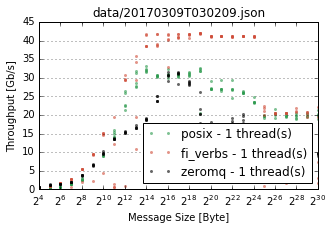

In [6]:
colors = { 'posix': '#2a994c', 'fi_verbs': '#CF4D39', 'zeromq': 'black' }
names = { 'posix': 'NetIO/Ethernet', 'fi_verbs': 'NetIO/Infiniband', 'zeromq': "ZeroMQ/Ethernet" }

def plot_datafile(df, ls='o', t=1, yerr=None):
    
    dfb = dict()
    backends = set(df.index.get_level_values('backend'))
    threads = set(df.index.get_level_values('threads'))
    df = df[df.index.get_level_values('threads')==t]
    for b in backends:
        dfb[b] = df[df.index.get_level_values('backend')==b]#.sort('message size [Byte]')
    
    plt.axes().yaxis.grid() # horizontal lines

    for b in backends:
        plt.semilogx(dfb[b].index.get_level_values('message size [Byte]'), dfb[b]['Throughput [Gb/s]'], ls,
                     label='%s - %d thread(s)'%(b,t), markeredgewidth=0, lw=1.4,  markersize=3,
                     alpha=0.6, basex=2, color=colors.get(b, 'black'))
        if yerr:
            lower = yerr[0][yerr[0].index.get_level_values("backend")== b]['Throughput [Gb/s]']
            upper = yerr[1][yerr[1].index.get_level_values("backend")== b]['Throughput [Gb/s]']

            plt.errorbar(dfb[b].index.get_level_values('message size [Byte]'), dfb[b]['Throughput [Gb/s]'],
                        yerr=[lower,upper], ls="None", color=colors.get(b, 'black'), alpha=0.6, lw=1.4,
                        zorder=30)
    plt.xlabel("Message Size [Byte]")
    plt.ylabel("Throughput [Gb/s]")
    
plt.figure(figsize=(5,3))
plot_datafile(df, t=1)
plt.legend(loc="best")
plt.title(datafile)

### Best Throughput of N

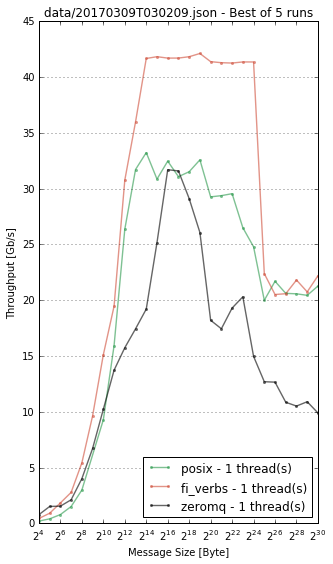

In [7]:
def plot_best_of_n(df, ls='o-', t=1):
    plot_datafile(df.groupby(level=(0,1,2)).max(), ls=ls, t=t)
    N = df.groupby(level=(0,1), axis=0).count()['Throughput [Gb/s]'].max()
    return N

plt.figure(figsize=(5,9))
N = plot_best_of_n(df)
plt.title("{} - Best of {} runs".format(datafile, N))
plt.legend(loc="best")

## Average Throughput

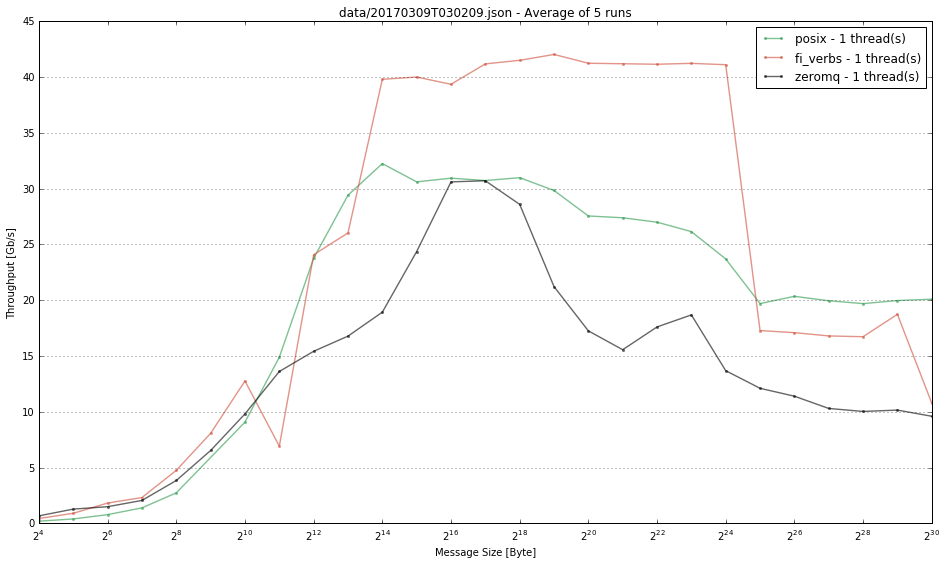

In [8]:
def plot_average(df, ls='o-', t=1):
    plot_datafile(df.groupby(level=(0,1,2)).mean(), ls=ls, t=t)

plt.figure(figsize=(16,9))  
plot_average(df)
plt.title("{} - Average of {} runs".format(datafile, N))
plt.legend(loc="best")

## Average with error bars

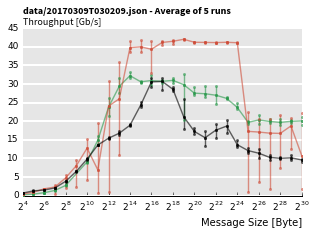

In [9]:
def plot_average_with_error(df, ls='o-', t=1):
    min, max = df.groupby(level=(0,1,2)).min(), df.groupby(level=(0,1,2)).max()
    mean = df.groupby(level=(0,1,2)).mean()
    lerr, uerr = mean-min, max-mean
    plot_datafile(mean, ls=ls, t=t, yerr=[lerr, uerr])

plt.figure(figsize=(5,3))  
plot_average_with_error(df)
plt.title("{} - Average of {} runs".format(datafile, N))
#plt.legend(loc="best")

plotconfig.config_plot(plt.gca())

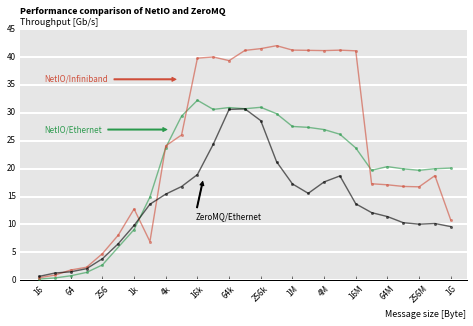

In [13]:
plt.rcParams["font.family"] = "Source Sans Pro"
plt.rcParams["font.size"] = 9


fig = plt.figure(figsize=(8,4.5), frameon=False)
#plot_average_with_error(df, ls='o-', t=1)
plot_average(df, ls='o-', t=1)


def annotate(s, xy, xytext, **kwargs):
    plt.annotate(names[s], xy=xy, xytext=xytext, color=colors[s],
                 arrowprops=dict(facecolor=colors[s], edgecolor=colors[s], shrink=0.05, width=1, headwidth=4, headlength=4), **kwargs)

annotate("posix", xy=(5000, 27), xytext=(20, 27), va='center')
annotate("zeromq", xy=(21000, 18), xytext=(65536, 11), ha='center')
annotate("fi_verbs", xy=(7500, 36), xytext=(20, 36), va='center')



ax = plt.gca()
ax.set_axis_bgcolor((0.97, 0.97, 0.97))
for loc in ("right", "top", "left"):
    ax.spines[loc].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.grid(True, color="white", ls='-', lw=2)

ax.text(0, 1.01, 'Throughput [Gb/s]', transform=ax.transAxes,
       va='bottom', ha='left', weight='normal', size=10)
ax.text(0, 1.01, 'Performance comparison of NetIO and ZeroMQ\n', transform=ax.transAxes,
       va='bottom', ha='left', weight='bold', size=10)

[line.set_zorder(30) for line in ax.lines]


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[2:5] = [ str(2**i) for i in range(4, 10, 2)]
labels[5:10] = [ str(2**i//1024)+'k' for i in range(10, 19, 2)]
labels[10:15] = [ str(2**i//1024//1024)+'M' for i in range(20, 30, 2)]
labels[15] = "1G"

ax.set_xticklabels(labels, ha='center', rotation=45.0)

plt.ylabel('')
plt.xlabel('Message size [Byte]', position=(1,0), ha='right', size=10)
#plt.xlabel('')
plt.title("")
plt.xlim(7, 2**31-1)

plotconfig.config_plot(plt.gca())
plt.savefig('NetIO-Throughput.svg', bbox_inches="tight")